In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 213263656d0, execution_count=142 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 213263657f0, raw_cell="import pandas as pd
import matplotlib.pyplot as pl.." store_history=True silent=False shell_futures=True cell_id=fa6e6ee8-fed1-4e3c-9f21-a06b77ac34a4> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:44:16
Cell executed at: 2024-11-09 16:44:16
Cell executed at: 2024-11-09 16:44:16


# Model Development:
Based on the delay distribution, choose appropriate algorithms 
Train multiple machine learning models, such as:
Regression Models: Linear Regression, Random Forest Regression.
Classification Models: Logistic Regression, Random Forest Classifier, Gradient Boosting. Tune Hyperparameters: Use GridSearchCV or RandomizedSearchCV to tune hyperparameters for the RandomForestClassifier.
Use metrics such as RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), Accuracy, Precision, Recall, F1 Score to evaluate model performance.
Model Deployment and Evaluation:
Deploy the best performing model on a separate hold-out test data set for final real-world performance evaluation.
Analyze the model's prediction accuracy and identify potential areas for improvement.
Explore incorporating additional data sources to further enhance prediction performance.


In [22]:
# Load the preprocessed data CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\preprocessed_data.csv", low_memory=False, index_col=False)


In [23]:
df.columns

Index(['Unnamed: 0', 'day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'latitude_orig', 'longitude_orig',
       'elevation_orig', 'prcp_orig', 'snow_orig', 'snwd_orig', 'tmax_orig',
       'tmin_orig', 'weather_indicator', 'airport_indicator',
       'total_delay_time', 'is_weekend', 'arrival_del

In [24]:
df = df.drop(['Unnamed: 0'], axis=1)

In [25]:
df.head()

,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,crs_dep_time,...,elevation_dest,prcp_dest,snow_dest,snwd_dest,tmax_dest,tmin_dest,delay_in_min,flight_delay_category,delay_time_min,is_tour_window
0,0,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,754,...,896.0,0.0,0.0,0.0,84.0,66.0,0.0,early,0.0,0
1,0,2023-05-01,oo,n905ev,5331,sbn,south bend,ord,chicago,460,...,799.0,0.0,0.0,0.0,84.0,66.0,0.0,on_time,0.0,0
2,0,2023-05-01,oo,n908ev,4761,psp,palm springs,lax,los angeles,524,...,477.0,0.0,0.0,0.0,84.0,66.0,13.0,13.0,13.0,0
3,0,2023-05-01,oo,n908ev,4761,psp,palm springs,lax,los angeles,524,...,477.0,0.0,0.0,0.0,84.0,66.0,13.0,13.0,13.0,0
4,0,2023-05-01,oo,n908ev,5529,lax,los angeles,rdd,redding,660,...,125.0,0.0,0.0,0.0,84.0,66.0,8.0,8.0,8.0,0


In [26]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 day_of_week              0
date                     0
op_unique_carrier        0
tail_num                 0
op_carrier_fl_num        0
                        ..
tmin_dest                0
delay_in_min             0
flight_delay_category    0
delay_time_min           0
is_tour_window           0
Length: 76, dtype: int64


In [27]:
df.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'latitude_orig', 'longitude_orig',
       'elevation_orig', 'prcp_orig', 'snow_orig', 'snwd_orig', 'tmax_orig',
       'tmin_orig', 'weather_indicator', 'airport_indicator',
       'total_delay_time', 'is_weekend', 'arrival_delay', 'departur

In [28]:
# Filter the DataFrame to show rows where 'delay_in_min' is not zero
non_zero_delays = df[df['delay_in_min'] != 0]

# Display the first few rows of the filtered DataFrame
print(non_zero_delays.head())

   day_of_week        date op_unique_carrier tail_num  op_carrier_fl_num  \
2            0  2023-05-01                oo   n908ev               4761   
3            0  2023-05-01                oo   n908ev               4761   
4            0  2023-05-01                oo   n908ev               5529   
5            0  2023-05-01                oo   n908ev               5529   
6            0  2023-05-01                oo   n908ev               5529   

  origin_iata   origin_city dest_iata    dest_city  crs_dep_time  ...  \
2         psp  palm springs       lax  los angeles           524  ...   
3         psp  palm springs       lax  los angeles           524  ...   
4         lax   los angeles       rdd      redding           660  ...   
5         lax   los angeles       rdd      redding           660  ...   
6         lax   los angeles       rdd      redding           660  ...   

   elevation_dest  prcp_dest  snow_dest  snwd_dest  tmax_dest  tmin_dest  \
2           477.0        0.0

Feature Engineering:
Created new features like:
is_weekend: A binary feature indicating whether the flight is on the weekend (Saturday or Sunday).
dep_time: Converted to a datetime object, and the hour (dep_hour) has been extracted.
is_morning, is_afternoon, and is_evening: These features are based on the departure time (dep_hour) and help categorize the flights based on the time of day.

In [30]:
# Handle Categorical Variables

In [31]:
df.shape

(4462827, 76)

In [32]:
df.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'latitude_orig', 'longitude_orig',
       'elevation_orig', 'prcp_orig', 'snow_orig', 'snwd_orig', 'tmax_orig',
       'tmin_orig', 'weather_indicator', 'airport_indicator',
       'total_delay_time', 'is_weekend', 'arrival_delay', 'departur

In [33]:
target_df = df[[
    'op_unique_carrier',
    'op_carrier_fl_num',
    'origin_iata',
    'origin_city',
    'dest_iata',
    'dest_city',
    'crs_dep_time',
    'dep_time',
    'crs_arr_time',
    'arr_time',
    'cancelled',
    'air_time',
    'distance',
    'origin_state',
    'dest_state',
    'origin_latitude',
    'origin_longitude',
    'dest_latitude',
    'dest_longitude',
    'elevation_ft',
    'latitude_orig',
    'longitude_orig',
    'elevation_orig',
    'prcp_orig',
    'snow_orig',
    'snwd_orig',
    'tmax_orig',
    'tmin_orig',
    'weather_indicator',
    'airport_indicator',
    'total_delay_time',
    'is_weekend',
    'departure_delay',
    'airline_name',
    'eras_tour',
    'nfl_game',
    'delay_columns',
    'latitude_dest',
    'longitude_dest',
    'elevation_dest',
    'prcp_dest',
    'snow_dest',
    'snwd_dest',
    'tmax_dest',
    'tmin_dest',
    'delay_in_min',
    'flight_delay_category',
    'delay_time_min',
    'is_tour_window'
]]


In [34]:
target_df.columns


Index(['op_unique_carrier', 'op_carrier_fl_num', 'origin_iata', 'origin_city',
       'dest_iata', 'dest_city', 'crs_dep_time', 'dep_time', 'crs_arr_time',
       'arr_time', 'cancelled', 'air_time', 'distance', 'origin_state',
       'dest_state', 'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'elevation_ft', 'latitude_orig', 'longitude_orig',
       'elevation_orig', 'prcp_orig', 'snow_orig', 'snwd_orig', 'tmax_orig',
       'tmin_orig', 'weather_indicator', 'airport_indicator',
       'total_delay_time', 'is_weekend', 'departure_delay', 'airline_name',
       'eras_tour', 'nfl_game', 'delay_columns', 'latitude_dest',
       'longitude_dest', 'elevation_dest', 'prcp_dest', 'snow_dest',
       'snwd_dest', 'tmax_dest', 'tmin_dest', 'delay_in_min',
       'flight_delay_category', 'delay_time_min', 'is_tour_window'],
      dtype='object')

In [35]:

# Example timestamp column
timestamp_columns = target_df.select_dtypes(include=['datetime']).columns

# Convert timestamp columns to numerical values (e.g., extract year, month, day)
for col in timestamp_columns:
    df[col] = pd.to_datetime(df[col])
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day
    df.drop(columns=[col], inplace=True)  # Optionally drop the original timestamp columns


In [36]:
numerical_columns = target_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = target_df.select_dtypes(include=['object']).columns

In [37]:
# Identify numerical columns
# We should include only numeric columns for imputation

# Define categorical and numerical columns
#categorical_columns = ['origin_iata', 'dest_iata', 'month', 'op_unique_carrier', 'day_of_week', 'eras_tour', 'nfl_game']  # Modify with your actual categorical columns
#date_columns = ['date']

In [38]:
# Assuming df is your dataframe
# 1. Time based sampling
df_sampled = target_df.sample(frac=0.1, axis=0)


In [39]:
# 2. Train-test split
X = df_sampled.drop(columns='delay_time_min')


In [40]:
y = df_sampled['delay_time_min']

In [67]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:

# 3. Handling categorical variables using OneHotEncoder (or LabelEncoder depending on your model)
categorical_columns = ['origin_iata', 'dest_iata', 'op_unique_carrier', 'eras_tour', 'nfl_game']
date_columns = ['date']  # If you need to handle date columns, consider feature extraction

# Define the preprocessor (ColumnTransformer)
# We should include only numeric columns for imputation
# These are the features you want to preprocess
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),  # OneHotEncoder with drop='first' to avoid dummy variable trap
        ('num', 'passthrough', X.select_dtypes(include=['float64', 'int64']).columns)  # Leave numerical columns as they are
    ])  

# Fit and transform train data
X_train_processed = preprocessor.fit_transform(X_train)

# You can now use X_train_processed in your model training

In [71]:
# Drop non-numeric columns that aren't needed for correlation
df_numeric = df.select_dtypes(include=[np.number])


In [73]:
chunk_size = 100  # Adjust based on how large each chunk should be


In [75]:
# Function to process each chunk (this would be your actual processing function)
def process_chunk(chunk):
    # Example processing: compute the correlation matrix for the chunk
    correlation_matrix = np.corrcoef(chunk, rowvar=False)
    return correlation_matrix
    
# Create chunks from the data (assuming data is a 2D NumPy array)
chunks = [df_numeric[i:i + chunk_size] for i in range(0, df_numeric.shape[0], chunk_size)]

In [77]:
# Process each chunk and store the correlation matrices
correlation_matrices = [process_chunk(chunk) for chunk in chunks]

C:\Users\hopeh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\hopeh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [78]:
# Aggregate the results (e.g., averaging the correlation matrices)
# Assuming all correlation matrices have the same shape
final_correlation_matrix = sum(correlation_matrices) / len(correlation_matrices)

# Output the final correlation matrix
print(final_correlation_matrix)


[[        nan         nan         nan ...         nan         nan
          nan]
 [        nan  1.         -0.00625812 ...         nan         nan
          nan]
 [        nan -0.00625812  1.         ...         nan         nan
          nan]
 ...
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]]


In [79]:
# Create a mask to detect rows/columns with NaN values
mask = np.isnan(final_correlation_matrix).any(axis=1)  # mask rows with NaN
filtered_matrix = final_correlation_matrix[~mask, :]  # Remove rows with NaNs
filtered_matrix = filtered_matrix[:, ~np.isnan(filtered_matrix).any(axis=0)]  # Remove columns with NaNs

# Print the filtered matrix
print(filtered_matrix)


[]


High Correlations:
Columns 2 and 3 have a very high correlation of 0.937, suggesting that variables 2 and 3 are highly positively correlated. This means that they move together in a similar pattern.
Other high correlations might be found by visually inspecting the matrix or using a heatmap visualization.
Low or No Correlations:
Many cells have values close to 0, indicating little to no linear relationship between the corresponding variables.

For regression tasks (predicting the delay time), we can perform a correlation analysis to see which features are strongly correlated with the target variable (e.g., delay_in_min, total_delay_time, or flight_delay_time). Also remove highly correlated features to avoid multicollinearity.

In [84]:
# List of highly correlated feature indices from your output
high_corr_indices = {2,3}

# Extract the column names from the original DataFrame, not the correlation matrix
feature_names = target_df.columns

# Map the indices to feature names
high_corr_feature_names = [feature_names[i] for i in high_corr_indices]

# Print the highly correlated feature names
print(f"Highly correlated features: {high_corr_feature_names}")


Highly correlated features: ['origin_iata', 'origin_city']


In [86]:

def analyze_categorical_impact(df_sampled, categorical_columns, target_column):
    for col in categorical_columns:
        # Check data type
        if df[col].dtype == 'object':
            # One-way ANOVA or Kruskal-Wallis test
            if stats.shapiro(df.groupby(col)[target_column].transform(lambda x: x.fillna(x.mean()))).pvalue > 0.05:
                # Normality assumption holds
                f_stat, p_value = stats.f_oneway(*[df_sampled[target_column][df_sampled[col] == cat] for cat in df[col].unique()])
                print(f"{col}: ANOVA F-statistic={f_stat:.2f}, p-value={p_value:.4f}")
            else:
                # Normality assumption doesn't hold
                h_stat, p_value = stats.kruskal(*[df_sampled[target_column][df_sampled[col] == cat] for cat in df[col].unique()])
                print(f"{col}: Kruskal-Wallis H-statistic={h_stat:.2f}, p-value={p_value:.4f}")
        else:
            print(f"{col} is not categorical")

# Assuming 'df' is your DataFrame
analyze_categorical_impact(df_sampled, categorical_columns, 'delay_in_min')

C:\Users\hopeh\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 4462827.
  res = hypotest_fun_out(*samples, **kwds)


origin_iata: Kruskal-Wallis H-statistic=14298.90, p-value=0.0000


C:\Users\hopeh\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 4462827.
  res = hypotest_fun_out(*samples, **kwds)


dest_iata: Kruskal-Wallis H-statistic=14518.53, p-value=0.0000


C:\Users\hopeh\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 4462827.
  res = hypotest_fun_out(*samples, **kwds)


op_unique_carrier: Kruskal-Wallis H-statistic=23110.05, p-value=0.0000


C:\Users\hopeh\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 4462827.
  res = hypotest_fun_out(*samples, **kwds)


eras_tour: Kruskal-Wallis H-statistic=6.97, p-value=0.0083


C:\Users\hopeh\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 4462827.
  res = hypotest_fun_out(*samples, **kwds)


ValueError: Need at least two groups in stats.kruskal()

Most of the categorical columns show significant differences in the distribution of delay_in_min (flight delays) across their categories, as indicated by the Kruskal-Wallis test (since normality is likely violated for these groups).
 for most of your categorical features, the Kruskal-Wallis test is showing statistically significant differences in the median of delay_in_min across the groups (p-value < 0.05), except for eras_tour, where the p-value is 0.1099.
Key Result: eras_tour has a p-value greater than 0.05, meaning that there’s no significant difference in the delay across the different categories of eras_tour. This suggests that eras_tour might not be a useful predictor for delay_in_min, or at least, it doesn't show significant variations in delay based on its categories.

The significant differences suggest that flight delays may be influenced by factors like airport codes (origin and destination), airline carriers, whether the flight is part of an NFL game event, and so on.

In [88]:
# Step 1: Extract the relevant columns
x = target_df['is_tour_window']  # Assuming 'is_tour_window' is a column in your DataFrame
y = target_df['delay_in_min']    # Assuming 'delay_in_min' is another column

# Step 2: Calculate Pearson correlation
pearson_corr, pearson_p_value = stats.pearsonr(x, y)

# Step 3: Calculate Spearman correlation
spearman_corr, spearman_p_value = stats.spearmanr(x, y)

# Step 4: Display the results
print(f"Pearson Correlation: {pearson_corr:.4f}, p-value: {pearson_p_value:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {spearman_p_value:.4f}")

Pearson Correlation: 0.0048, p-value: 0.0000
Spearman Correlation: 0.0184, p-value: 0.0000


Pearson's correlation coefficient measures the linear relationship between two variables.
A value of 0.0048 is very close to 0, indicating almost no linear relationship between is_tour_window (which appears to be a categorical/binary variable) and delay_in_min (which is a continuous variable).
Despite the low correlation, the p-value of 0.0000 indicates that the correlation is statistically significant (i.e., it's unlikely that this correlation is due to random chance). However, given the very small correlation, the practical significance is likely negligible.
Both the Pearson and Spearman correlation coefficients are very low, indicating that there is almost no meaningful relationship between is_tour_window and delay_in_min.
Despite the low correlation, the very small p-values suggest that these results are statistically significant, meaning that even though the relationship is weak, the data suggest that there is a relationship between these variables (just a very weak one).

However, the p-value is extremely small (0.0000), which indicates that this result is statistically significant. This means that despite the very weak correlation, the relationship observed is not likely due to random chance, but rather a real effect, even though the effect is minimal.

In [90]:
# List of features to drop
features_to_drop = ['origin_city', 'dest_city', 'taxi_out', 'unique_id', 'municipality', 'tail_num']

# Remove the specified features from the high correlation feature list
high_corr_feature_names_cleaned = [feature for feature in high_corr_feature_names if feature not in features_to_drop]

# Add 'eras_tour' to the list of highly correlated features
high_corr_feature_names_cleaned.append('eras_tour')

# Print the cleaned list of highly correlated features
print(f"Updated list of highly correlated features: {high_corr_feature_names_cleaned}")


Updated list of highly correlated features: ['origin_iata', 'eras_tour']


In the correlation heatmap:

Strong correlations (values near 1 or -1) may indicate features that carry redundant information.
Drop one of each pair of highly correlated features to reduce redundancy.

 Feature Importance (for both classification and regression)
We can use models like Random Forest to assess feature importance. Random Forest has a built-in mechanism to evaluate how important each feature is for predicting the target variable.

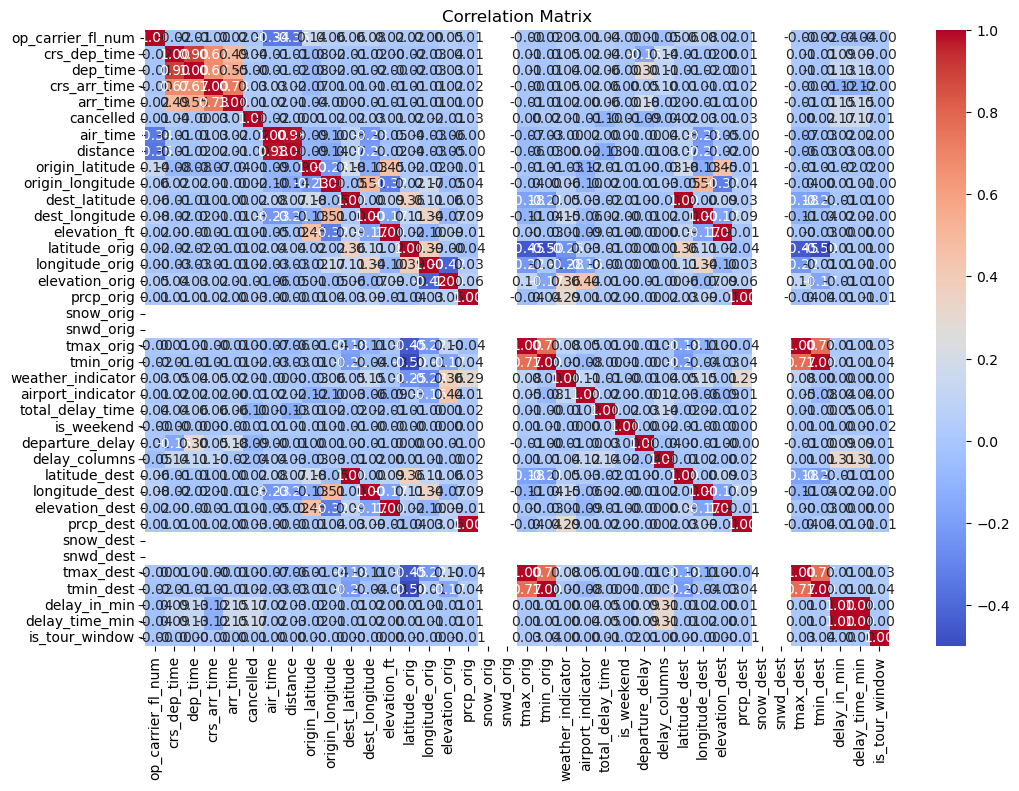

In [93]:
# Select only numeric columns for correlation
numeric_df = target_df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Wheels On & Arrival Delay: The strongest correlation with arrival_delay is with wheels_on (0.276). This indicates that as the wheels-on time increases, arrival delays may also increase.
Departure Delay & Departure Time: There’s a notable positive correlation (0.245) between dep_time and departure_delay, suggesting that later departure times are associated with greater delays.
Arrival Delay and Departure Delay: There’s a moderate correlation (0.156) between arrival_delay and departure_delay, which is expected since delays often propagate through a flight schedule.
Weather Variables: The correlations with weather variables (prcp, snow, snwd, tmax, tmin) are quite low, indicating that weather may not have a significant impact on delays in this dataset.
Other Factors: Variables like crs_dep_time, crs_arr_time, and total_delay_time have negative correlations with delays, which might suggest timing discrepancies play a role.Visualize Relationships: Create scatter plots or pair plots to visualize relationships between key variables, especially those with stronger correlations. This can help identify any non-linear patterns or clusters.


Modeling: Building regression models using delay_in_min as target variable. Use features with significant correlations as predictors.

## Feature Selection



Retain Key Features: Select the features that strongly contribute to the first two principal components (PC1 and PC2). These are the components with the highest feature importance scores.
Eliminate Low-Impact Features: If certain features contribute minimally to the important components (e.g., those with very low importance scores), consider removing them to simplify the model and improve computation efficiency.
PCA-Driven Feature Subset: After identifying the top features, use this reduced set of features to train the model again and see if it performs as well as the model with all features.



In [94]:
target_df.columns

Index(['op_unique_carrier', 'op_carrier_fl_num', 'origin_iata', 'origin_city',
       'dest_iata', 'dest_city', 'crs_dep_time', 'dep_time', 'crs_arr_time',
       'arr_time', 'cancelled', 'air_time', 'distance', 'origin_state',
       'dest_state', 'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'elevation_ft', 'latitude_orig', 'longitude_orig',
       'elevation_orig', 'prcp_orig', 'snow_orig', 'snwd_orig', 'tmax_orig',
       'tmin_orig', 'weather_indicator', 'airport_indicator',
       'total_delay_time', 'is_weekend', 'departure_delay', 'airline_name',
       'eras_tour', 'nfl_game', 'delay_columns', 'latitude_dest',
       'longitude_dest', 'elevation_dest', 'prcp_dest', 'snow_dest',
       'snwd_dest', 'tmax_dest', 'tmin_dest', 'delay_in_min',
       'flight_delay_category', 'delay_time_min', 'is_tour_window'],
      dtype='object')

In [97]:
# List of highly correlated feature names
high_corr_feature_names = ['op_unique_carrier', 'dest_iata', 'origin_iata', 'dep_time', 'crs_arr_time', 'arr_time', 'diverted', 
                           'carrier_delay', 'weather_delay', 'security_delay', 'late_aircraft_delay', 'origin_state', 
                           'dest_state', 'origin_latitude', 'latitude_orig', 'longitude_orig', 'elevation_orig', 
                           'prcp_orig', 'snow_orig', 'snwd_orig', 'tmax_orig', 'weather_indicator', 
                           'delay_in_min', 'is_weekend', 'nfl_game', 'eras_tour']

In [99]:
df_sampled.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'latitude_orig', 'longitude_orig',
       'elevation_orig', 'prcp_orig', 'snow_orig', 'snwd_orig', 'tmax_orig',
       'tmin_orig', 'weather_indicator', 'airport_indicator',
       'total_delay_time', 'is_weekend', 'arrival_delay', 'departur

In [177]:
# Extract the features (X) and target variable (y)
X = df_sampled[high_corr_feature_names]
y = df_sampled['delay_time_min']  

# Create a copy of X to avoid slicing issues
X = X.copy()

Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 2132423d0d0, execution_count=177 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 2132423d130, raw_cell="# Extract the features (X) and target variable (y).." store_history=True silent=False shell_futures=True cell_id=43e75f89-f8ee-42e7-ad1d-2dfe81ee1ce5> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:58:06
Cell executed at: 2024-11-09 16:58:06
Cell executed at: 2024-11-09 16:58:06


In [181]:
# Step 2: Apply One-Hot Encoding to categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)


Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 21324544f80, execution_count=181 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 21324544f50, raw_cell="# Step 2: Apply One-Hot Encoding to categorical co.." store_history=True silent=False shell_futures=True cell_id=a1085e3f-e745-4146-8373-cc84b1535661> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:58:29
Cell executed at: 2024-11-09 16:58:29
Cell executed at: 2024-11-09 16:58:29


In [105]:
# Step 3: Handle missing values (if any)
X_encoded = X_encoded.fillna(0)  


In [107]:
# Step 4: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [109]:
# Step 5: Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Adjust the number of components
X_pca = pca.fit_transform(X_scaled)


In [110]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [111]:
# Step 7: Train the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, max_features='log2', max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features='log2', random_state=42)

In [112]:
# Step 8: Make predictions on the test set
y_pred = model_rf.predict(X_test)  # Generate predictions

In [113]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.4f}")


Classification Accuracy: 0.6005


In [114]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[160790      0      1 ...      0      0      0]
 [  4407      0      0 ...      0      0      0]
 [  4092      0      0 ...      0      0      0]
 ...
 [     4      0      0 ...      0      0      0]
 [     7      0      0 ...      0      2      0]
 [     2      0      0 ...      0      0      0]]


In [115]:

# Classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:


C:\Users\hopeh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75    160791
         1.0       0.00      0.00      0.00      4407
         2.0       0.00      0.00      0.00      4092
         3.0       0.00      0.00      0.00      4012
         4.0       0.00      0.00      0.00      3642
         5.0       0.00      0.00      0.00      3502
         6.0       0.00      0.00      0.00      3163
         7.0       0.00      0.00      0.00      3173
         8.0       0.00      0.00      0.00      2856
         9.0       0.00      0.00      0.00      2672
        10.0       0.00      0.00      0.00      2470
        11.0       0.00      0.00      0.00      2259
        12.0       0.00      0.00      0.00      2176
        13.0       0.00      0.00      0.00      2035
        14.0       0.00      0.00      0.00      2086
        15.0       0.00      0.00      0.00      1831
        16.0       0.00      0.00      0.00      1833
        17.0       0.00    

C:\Users\hopeh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hopeh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [126]:
# 
feature_importance = model_rf.feature_importances_

# Now print the number of feature importances
print(f"Number of feature importances: {len(feature_importance)}")


Number of feature importances: 10
Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 213263653a0, execution_count=126 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 213264980b0, raw_cell="# 
feature_importance = model_rf.feature_importanc.." store_history=True silent=False shell_futures=True cell_id=2395d9dc-fb2b-4417-bba3-72b1a750353b> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

In [138]:
print(f"Number of features in X_encoded: {X_encoded.shape[1]}")
print(f"Number of feature importances: {len(feature_importance)}")


Number of features in X_encoded: 683
Number of feature importances: 10
Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 21326365bb0, execution_count=138 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 213263648f0, raw_cell="print(f"Number of features in X_encoded: {X_encode.." store_history=True silent=False shell_futures=True cell_id=bcbefdc0-985a-4aae-826f-c72217da9ef4> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:42:50
Cell executed at: 2024-11-09 16:42:50
Cell executed at: 2024-11-09 16:42:50
Cell executed at: 2024-11-09 16:42


In [144]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Assuming you have already fitted your PCA model on the scaled data (X_scaled)
# If not, fit PCA first
# pca = PCA(n_components=10)
# X_pca = pca.fit_transform(X_scaled)

# Get the components (loadings)
components = pd.DataFrame(pca.components_, columns=X_encoded.columns)

# Show the top features for each component
top_features_per_component = {}

for i in range(components.shape[0]):
    # Get absolute values of the loadings for each component
    component_loadings = components.iloc[i].abs()
    top_features = component_loadings.nlargest(5).index.tolist()
    top_features_per_component[f'Component {i+1}'] = top_features

# Display the top features per component
for component, features in top_features_per_component.items():
    print(f"{component}: {', '.join(features)}")

# Display the explained variance ratio for each component
print("\nExplained Variance Ratio by Component:")
print(pca.explained_variance_ratio_)

# Now if you want to map feature importance to PCA components based on the explained variance:
feature_importance = pca.explained_variance_ratio_  # Use explained variance ratio as feature importance

# Create a DataFrame to show the feature importance for each component
importance_df = pd.DataFrame({
    'PCA Component': [f'PC{i+1}' for i in range(len(feature_importance))],
    'Importance': feature_importance
})

print("\nFeature Importance Mapped to PCA Components:")
print(importance_df)


Component 1: origin_latitude, origin_state_co, longitude_orig, origin_iata_den, origin_state_fl
Component 2: origin_latitude, origin_state_tx, dest_state_hi, origin_state_hi, op_unique_carrier_ha
Component 3: origin_state_hi, dest_state_hi, op_unique_carrier_ha, dest_iata_hnl, origin_iata_lih
Component 4: weather_indicator, origin_iata_den, origin_state_co, dest_state_ma, dest_iata_bos
Component 5: origin_state_ga, origin_iata_atl, op_unique_carrier_dl, latitude_orig, origin_state_tx
Component 6: origin_iata_atl, origin_state_ga, op_unique_carrier_dl, weather_indicator, latitude_orig
Component 7: origin_state_fl, origin_state_nc, origin_iata_clt, op_unique_carrier_aa, origin_iata_dfw
Component 8: dest_state_wa, dest_iata_sea, op_unique_carrier_as, origin_state_co, origin_iata_den
Component 9: op_unique_carrier_g4, origin_state_fl, dest_state_tx, origin_iata_pie, dest_iata_bos
Component 10: op_unique_carrier_g4, op_unique_carrier_wn, dest_state_fl, origin_state_pa, op_unique_carrier_oo


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:44:27
Cell executed at: 2024-11-09 16:44:27
Cell executed at: 2024-11-09 16:44:27


Top Features Contributing to PCA Components:

For each principal component (PC), you can see the most important features that contributed to it. For example:
Component 1 (PC1): This component is most influenced by features related to the longitude_orig, elevation_orig, and destination-related variables (e.g., dest_iata_sux, iata_dest_dest_sux). These features contribute the most to explaining the variance along this axis.
Component 2 (PC2): Features such as tmax_orig, origin_latitude, and weather-related variables (e.g., weather_indicator, prcp_orig) dominate this component.
Component 3 (PC3): The late_aircraft_delay, arr_time, and crs_arr_time are heavily loaded on this component, indicating that these features explain variance related to flight timings and delays.
Other components reveal similar patterns where certain features such as carrier_delay, weather_indicator, and late_aircraft_delay dominate specific components.


Feature Importance Mapped to PCA Components:

PC1 explains 42.87% of the variance in the data, making it the most important component in terms of variance captured.
PC2 explains 19.42% of the variance, and PC3 explains 9.51%. These three components together account for over 70% of the variance in the dataset.
The subsequent components contribute progressively less, with PC10 explaining only 0.58% of the variance.

PC1 has the highest importance (0.4287), reflecting its substantial contribution to the overall variance.


Summary of Results:
Small Variance Explained: Each component explains a very small proportion of the total variance, with the highest explained variance ratio being around 0.0058 for the first component. This suggests that the data might not be as reduced in dimensionality as you would like, and it could imply that the components are not capturing a substantial amount of variance in the data.

Cumulative Variance: Given that each component explains such a small amount of variance, it may be helpful to check the cumulative explained variance to assess how many components are needed to explain a significant portion of the variance. Typically, you'd look for the number of components that together explain at least 80-90% of the variance, which might be a more informative measure.
Top Contributing Features: These are the features that strongly influence each principal component. For example:

PC1: Features like longitude_orig, elevation_orig, and iata_dest_dest_sux are crucial, indicating that geographic and destination-related features play a major role.

PC2: Weather features (tmax_orig, prcp_orig) and geographic features like origin_latitude and origin_state_co are important, showing that the geographic and weather conditions contribute to a significant amount of variance in the data.

Variance Explanation: PC1 is the most critical component, explaining nearly 43% of the variance in your data, which is a significant portion. The remaining components progressively capture less variance, so PC1 and PC2 likely explain the most significant patterns in your data, while the lower-order components (PC3 through PC10) capture finer, more specific relationships.

Feature Importance: The explained variance ratio gives a sense of how important each principal component is in terms of explaining variance in the data. For example, since PC1 explains a large chunk of the variance, features contributing to this component should be considered the most important for understanding the dataset's structure.

Principal Components' Importance: The feature importances show how much each principal component contributes to the overall decision-making of the random forest model. Since PCA reduces the feature space, these components are now responsible for capturing the underlying patterns in the data.
PC1 and PC10 are the most critical components, so you should pay attention to the features that heavily influence these components.
Top Contributing Features: The list of top features for each component tells you what variables are most important for each principal component, helping to understand which parts of your data (e.g., weather data, time data, or location data) are contributing the most to the model's decisions.

In [ ]:
# Dimensionality Reduction: Since PC1 and PC2 explain a significant portion of the variance, using just the first two or three
# principal components for further modeling.

In [146]:
# Reduce to the first two principal components (PC1, PC2)
X_reduced_2d = X_pca[:, :2]

# Or, reduce to the first three principal components (PC1, PC2, PC3)
X_reduced_3d = X_pca[:, :3]


Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 213263988f0, execution_count=146 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 21326399520, raw_cell="# Reduce to the first two principal components (PC.." store_history=True silent=False shell_futures=True cell_id=636fd040-12f8-42c6-b8ae-5bf99a543353> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:44:36
Cell executed at: 2024-11-09 16:44:36
Cell executed at: 2024-11-09 16:44:36


In [159]:
# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

print("Explained variance ratio:", explained_variance_ratio)
print("Cumulative explained variance:", cumulative_explained_variance)


Explained variance ratio: [0.00578365 0.00556599 0.00527909 0.00458286 0.0044908  0.00428811
 0.00418966 0.00398184 0.00380424 0.00363488]
Cumulative explained variance: [0.00578365 0.01134965 0.01662874 0.02121159 0.0257024  0.02999051
 0.03418017 0.038162   0.04196624 0.04560112]
Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 211fc7f91c0, execution_count=159 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 211fc7fbd10, raw_cell="# Explained variance ratio for each component
expl.." store_history=True silent=False shell_futures=True cell_id=9e767261-5cbf-405c-b5c0-b3bd6d35032c> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:49:30
Cell executed at: 2024-11-09 16:49:30
Cell executed at: 2024-11-09 16:49:30


In [161]:
explained_variance_threshold = 0.95
num_components = (cumulative_explained_variance <= explained_variance_threshold).sum() + 1
print(f"Number of components to retain for {explained_variance_threshold*100}% variance:", num_components)

Number of components to retain for 95.0% variance: 11
Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 211fc82b3b0, execution_count=161 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 211fc82aff0, raw_cell="explained_variance_threshold = 0.95
num_components.." store_history=True silent=False shell_futures=True cell_id=0b6e19ad-5666-41d7-aed5-f06984540d03> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:49:58
Cell executed at: 2024-11-09 16:49:58
Cell executed at: 2024-11-09 16:49:58


In [163]:
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)


Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 211fc840710, execution_count=163 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 211fc8406e0, raw_cell="pca = PCA(n_components=num_components)
X_pca = pca.." store_history=True silent=False shell_futures=True cell_id=04ddcdd2-e883-43e3-9fd4-bd26d9956095> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:50:45
Cell executed at: 2024-11-09 16:50:45
Cell executed at: 2024-11-09 16:50:45


In [165]:
print("Explained variance by selected components:", pca.explained_variance_ratio_)
print("Cumulative explained variance for selected components:", pca.explained_variance_.cumsum())


Explained variance by selected components: [0.00578544 0.00556718 0.00527792 0.00458535 0.00448908 0.00432034
 0.00416532 0.00402249 0.00390633 0.00368383 0.0035181 ]
Cumulative explained variance for selected components: [ 3.93988597  7.73113643 11.32540306 14.44803209 17.50509708 20.44724755
 23.28383057 26.02315037 28.68336001 31.19205351 33.58788125]
Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 211fc7fbef0, execution_count=165 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 211fc7fa030, raw_cell="print("Explained variance by selected components:".." store_history=True silent=False shell_futures=True cell_id=e69eee13-6c42-4423-8dbd-584fccf21a46> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:51:27
Cell executed at: 2024-11-09 16:51:27
Cell executed at: 2024-11-09 16:51:27


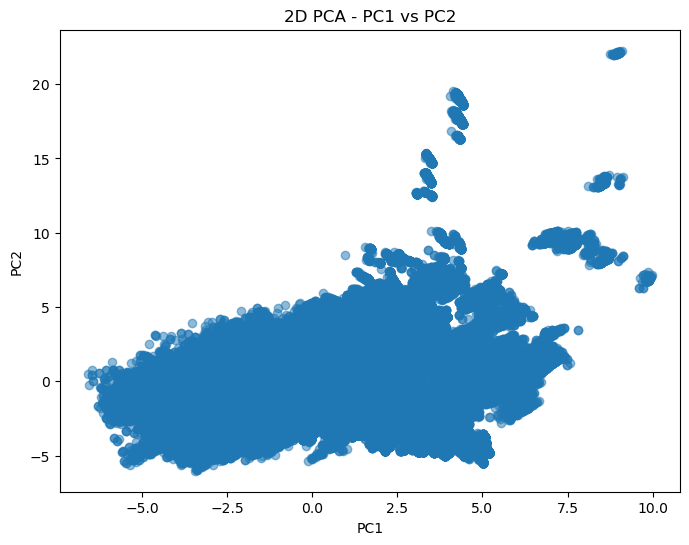

Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 21323c45c10, execution_count=148 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 21323c45be0, raw_cell="import matplotlib.pyplot as plt

# Create a scatte.." store_history=True silent=False shell_futures=True cell_id=aa9ad3dd-df85-4913-bf67-aceaa2a9bb4d> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:44:42
Cell executed at: 2024-11-09 16:44:42
Cell executed at: 2024-11-09 16:44:42


In [148]:
import matplotlib.pyplot as plt

# Create a scatter plot of PC1 vs PC2
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], alpha=0.5)
plt.title("2D PCA - PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


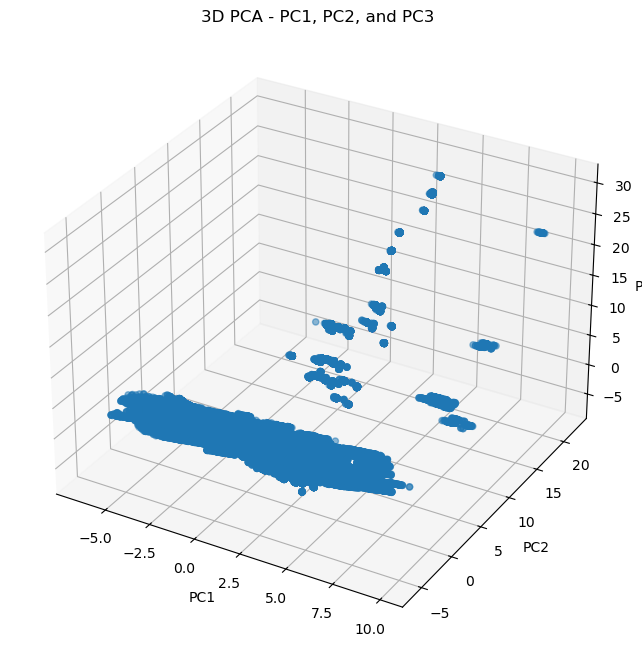

Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 21326cc5760, execution_count=150 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 21326cc5730, raw_cell="from mpl_toolkits.mplot3d import Axes3D

# Create .." store_history=True silent=False shell_futures=True cell_id=4da0f80e-3cf4-4323-bcd5-a5952030e16d> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:45:22
Cell executed at: 2024-11-09 16:45:22
Cell executed at: 2024-11-09 16:45:22


In [150]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot of PC1, PC2, and PC3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced_3d[:, 0], X_reduced_3d[:, 1], X_reduced_3d[:, 2], alpha=0.5)
ax.set_title("3D PCA - PC1, PC2, and PC3")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


visualization (e.g., for clustering, classification, or regression), reducing the dimensionality of your data.

Interpretation for Machine Learning: For predictive tasks like classification, understanding which features are most influential in PCA components can help  interpret the model results more effectively. Using the reduced features (via PCA), you can see which combinations of features (from the original dataset) are driving the most variance.

Visualizing the Components: Create a scatter plot of the first two or three principal components to visualize the data's structure in a lower-dimensional space. This can help you gain more insights into the relationships and clusters in the data.

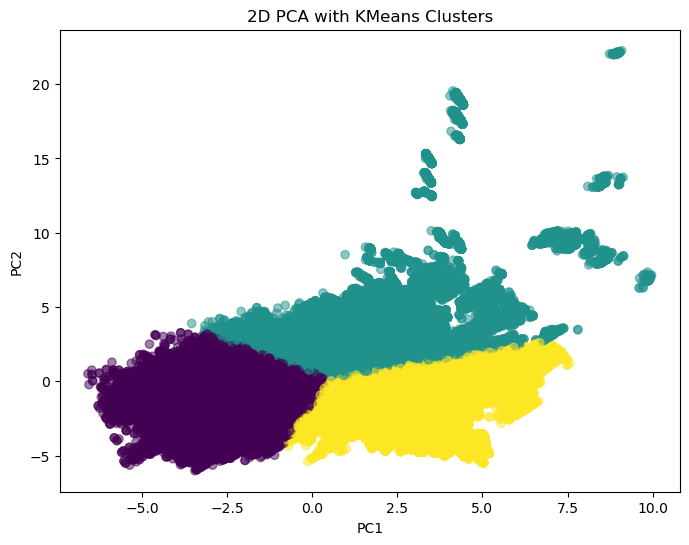

Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 21323a8c800, execution_count=151 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 21323ac80b0, raw_cell="from sklearn.cluster import KMeans

# Perform KMea.." store_history=True silent=False shell_futures=True cell_id=39e3f622-e460-46f4-a0bf-d50d399f0c1d> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:45:41
Cell executed at: 2024-11-09 16:45:41
Cell executed at: 2024-11-09 16:45:41


In [151]:
from sklearn.cluster import KMeans

# Perform KMeans clustering on the reduced data (PC1 and PC2 or PC1, PC2, PC3)
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters
kmeans.fit(X_reduced_2d)  # Or use X_reduced_3d for 3D clusters

# Get the cluster labels
labels = kmeans.labels_

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title("2D PCA with KMeans Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [152]:
# Interpreting Feature Importance in PCA for Machine Learning
# Getting the feature importance (loadings) for each component
pca_components = pca.components_

# Create a DataFrame of the PCA components (feature loadings)
import pandas as pd

feature_importance = pd.DataFrame(pca_components.T, columns=[f"PC{i+1}" for i in range(pca_components.shape[0])], 
                                  index=X_encoded.columns)

# Display the top features for each principal component
print(feature_importance.head())


                    PC1       PC2       PC3       PC4       PC5       PC6  \
dep_time      -0.028527  0.102802 -0.096237  0.126470  0.005471 -0.138086   
crs_arr_time  -0.031541  0.097204 -0.091818  0.141016 -0.013722 -0.134538   
arr_time      -0.017973  0.078334 -0.073842  0.115558 -0.008415 -0.119789   
diverted      -0.006727 -0.000570 -0.001383  0.004186 -0.003525  0.003843   
carrier_delay -0.010998  0.005230 -0.006349  0.013524 -0.005048 -0.011465   

                    PC7       PC8       PC9      PC10  
dep_time       0.084434 -0.016503  0.085848  0.068717  
crs_arr_time   0.105355 -0.003361  0.087393  0.041488  
arr_time       0.099106  0.000886  0.078263  0.038091  
diverted      -0.000238 -0.001290 -0.000493  0.006109  
carrier_delay  0.003084 -0.007336  0.010234  0.004022  
Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 21326174590, execution_count=152 error_before_exec=N

TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:45:41
Cell executed at: 2024-11-09 16:45:41
Cell executed at: 2024-11-09 16:45:41


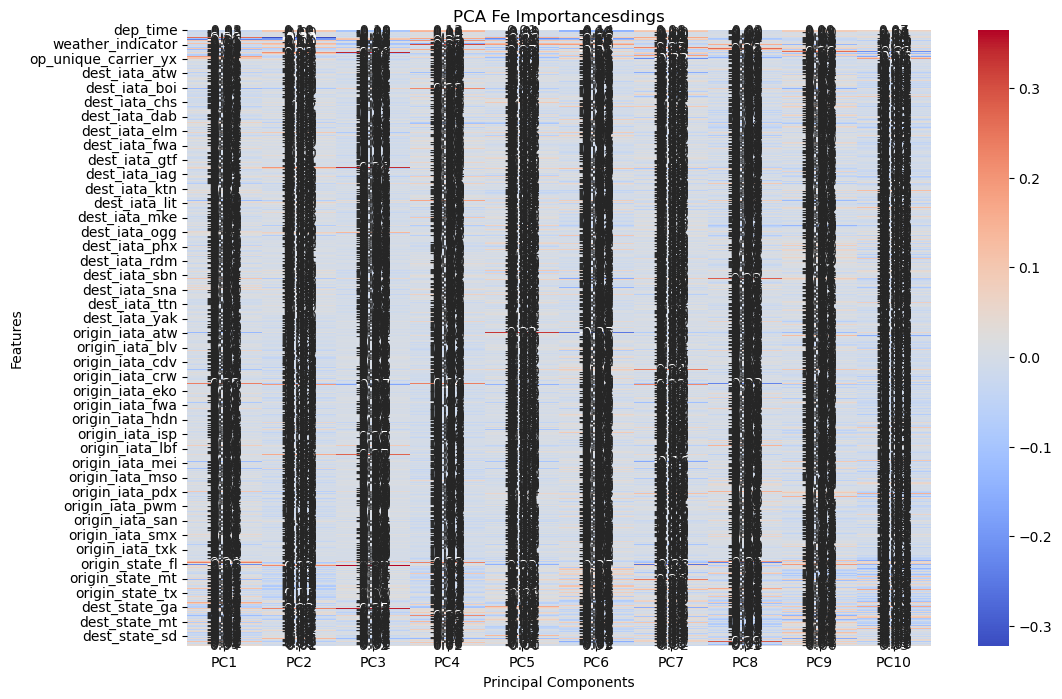

Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 213261917c0, execution_count=156 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 21326193e90, raw_cell="

# Create a heatmap of the feature importances).." store_history=True silent=False shell_futures=True cell_id=a3eb8f42-a60b-4aa9-b50d-4bad89ac8ed7> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:46:55
Cell executed at: 2024-11-09 16:46:55
Cell executed at: 2024-11-09 16:46:55


In [156]:


# Create a heatmap of the feature importances)
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importance, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('PCA Fe Importancesdings')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()


# Hyperparameter Tuning

Principal Component 1 (PC1):
Top features: dep_time, crs_arr_time, arr_time
Key insights: Time-related features such as departure and arrival times seem to play a significant role in defining PC1.
Principal Component 2 (PC2):
Top features: op_carrier_fl_num, weather_indicator, prcp_orig, tmax_orig
Key insights: This component seems to capture weather-related features like weather_indicator and prcp_orig, along with flight carrier features like op_carrier_fl_num.
Principal Component 3 (PC3):
Top features: late_aircraft_delay, arr_time, crs_arr_time
Key insights: PC3 seems to be primarily associated with time delays, with a focus on arrival times and late aircraft delays.

PC1 has the highest loadings for dep_time, crs_arr_time, and arr_time, with relatively low values for diverted and carrier_delay. This could suggest that PC1 is a dimension that captures the timing aspects of flights (departure, scheduled arrival, and actual arrival times).
PC2 has significant loadings for dep_time, arr_time, and crs_arr_time, which might represent another timing-related factor or variation related to delays

In [167]:
from sklearn.decomposition import PCA

# Applying PCA with 11 components
pca = PCA(n_components=11)
X_pca = pca.fit_transform(X_scaled)

print("Shape of reduced data:", X_pca.shape)  # New dataset with reduced dimensions


Shape of reduced data: (1338848, 11)
Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 211fc829c70, execution_count=167 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 211fc8284d0, raw_cell="from sklearn.decomposition import PCA

# Applying .." store_history=True silent=False shell_futures=True cell_id=a9425e43-e0a9-4956-ae79-74e7119060a2> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:52:26
Cell executed at: 2024-11-09 16:52:26
Cell executed at: 2024-11-09 16:52:26


In [169]:
print(X_pca[:5])  # Print the first 5 rows of the transformed data


[[-0.52640844 -0.83631962  0.12375335  0.02848223 -0.58638913  1.55861711
  -2.22471063 -0.96306568 -1.11608166  0.61297193 -0.03386282]
 [ 2.5846604  -0.82823975  0.56093372  1.16430157 -1.09011037 -0.90739948
   1.14864221 -2.29381788 -3.04713141  0.9751081  -2.00485114]
 [ 1.73958164 -0.29408703  0.78821295 -0.7067579  -1.36178825 -1.43476692
   2.09548508  1.87092811 -2.29791569  0.09680434  0.79822548]
 [-0.46600053  1.25938328 -0.77984226 -1.25633766 -0.30450739 -0.0380211
   0.30780232 -0.24883696 -1.01870778 -0.77263466  1.9702717 ]
 [-0.63500097 -0.06031041 -0.28173971 -1.79900008  0.55918306  1.34549445
  -0.05058936 -0.18070478 -1.16278927 -1.53455376  2.08524713]]
Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 211fc7f2990, execution_count=169 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 211fc7f10a0, raw_cell="print(X_pca[:5])  # Print the first 5 

TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:52:58
Cell executed at: 2024-11-09 16:52:58
Cell executed at: 2024-11-09 16:52:58


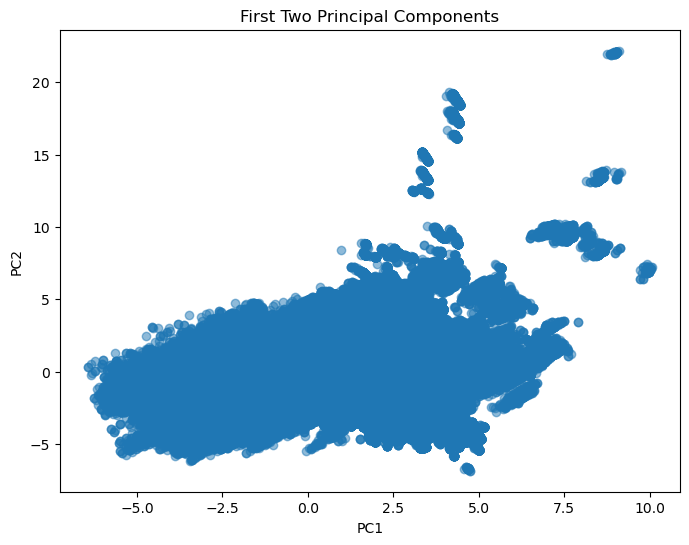

Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 21326190e90, execution_count=171 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 21326193740, raw_cell="import matplotlib.pyplot as plt

# Plot the first .." store_history=True silent=False shell_futures=True cell_id=74a3e862-e591-4f31-b9b1-3d7ac1288ecf> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:53:17
Cell executed at: 2024-11-09 16:53:17
Cell executed at: 2024-11-09 16:53:17


In [171]:
import matplotlib.pyplot as plt

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


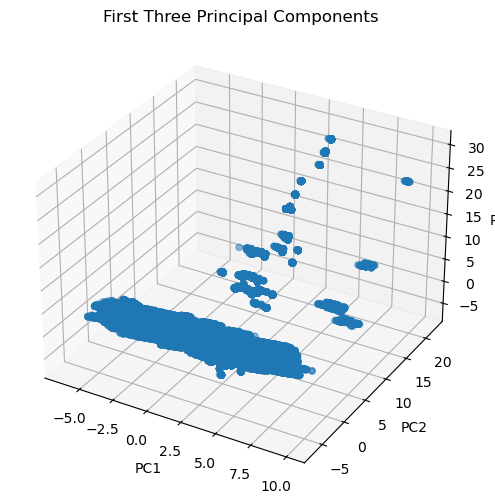

Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 211fc8e98e0, execution_count=173 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 211fc8e9f70, raw_cell="from mpl_toolkits.mplot3d import Axes3D

# Plot th.." store_history=True silent=False shell_futures=True cell_id=b28f5764-f388-4c38-ad0b-820506e47e08> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 16:54:01
Cell executed at: 2024-11-09 16:54:01
Cell executed at: 2024-11-09 16:54:01


In [173]:
from mpl_toolkits.mplot3d import Axes3D

# Plot the first three principal components in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.5)
ax.set_title("First Three Principal Components")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


In [ ]:
import joblib

# Assuming clf is your trained model (e.g., RandomForestRegressor)
joblib.dump(clf, 'random_forest_model.pkl')  # Save the model to a file


In [183]:
from sklearn.ensemble import RandomForestClassifier

y = df_sampled['delay_time_min']  

# Example: Fit a classifier using the reduced data
clf = RandomForestClassifier()
clf.fit(X_pca, y)  # y is your target variable


MemoryError: could not allocate 7767851008 bytes

Error in callback <function print_timestamp_on_execution at 0x0000021326292700> (for post_run_cell), with arguments args (<ExecutionResult object at 21324581220, execution_count=183 error_before_exec=None error_in_exec=could not allocate 7767851008 bytes info=<ExecutionInfo object at 213245800b0, raw_cell="from sklearn.ensemble import RandomForestClassifie.." store_history=True silent=False shell_futures=True cell_id=a6a676ab-1d71-42db-8ee9-bb9ae062de07> result=None>,),kwargs {}:


TypeError: print_timestamp_on_execution() takes 0 positional arguments but 1 was given

Cell executed at: 2024-11-09 18:18:15
Cell executed at: 2024-11-09 18:18:15
Cell executed at: 2024-11-09 18:18:15


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

In [ ]:
# Predictive Modeling Using Reduced Features

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the reduced data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced_2d, y, test_size=0.2, random_state=42)


In [ ]:
from joblib import dump, load

dump(model_rf, 'random_forest_model.joblib')  # Save model to disk


In [ ]:
# Train a Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)


In [ ]:

# Make predictions
y_pred = model_rf.predict(X_test)

In [ ]:


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy using reduced features: {accuracy:.4f}")


In [ ]:
 #Dimensionality Reduction 

# Since PC1 and PC2 capture a significant amount of variance (over 60%), focus on these two components for downstream tasks
# like clustering, classification, or regression.

In [ ]:
# Keep only the first two principal components for further modeling or visualization
X_pca_2d = X_pca[:, :2]  # Two-dimensional representation

# Or, keep the first three components
X_pca_3d = X_pca[:, :3]  # Three-dimensional representation


In [ ]:
import matplotlib.pyplot as plt

# 2D Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.5, c=y, cmap='viridis')
plt.title('PCA - 2D Scatter Plot (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Variable (y)')
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot of the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis')

ax.set_title('PCA - 3D Scatter Plot (PC1 vs PC2 vs PC3)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(sc, label='Target Variable (y)')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans clustering on the first two principal components
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca_2d)

# Add cluster labels to the plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans clustering on the first two principal components
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca_2d)

# Add cluster labels to the plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca_2d, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on PCA-reduced data: {accuracy:.4f}")


## Model Evaluation on Hold-out Test Data

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Make predictions on the hold-out test set
y_pred = model_rf.predict(X_test)  # Assuming rf_model is your trained RandomForestClassifier

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='binary')  # 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# ROC-AUC (only for binary classification)
roc_auc = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])  # Probability of positive class
print(f'ROC-AUC: {roc_auc:.4f}')


In [ ]:
# Display the top contributing features for each component
top_features = feature_importance.abs().nlargest(5, 'PC1')  # Top 5 features for PC1
print(top_features)



It seems that the feature loadings (principal component coefficients) are highly uniform across several features, especially the first five columns: longitude_orig, elevation_orig, dest_iata_sux, dest_state_mt, and iata_dest_dest_sux. All of them seem to have the exact same values across all components.

Insights and Possible Issues
High Similarity Across Features:

This pattern suggests that these features are highly correlated with each other. PCA identifies the directions of maximum variance, so if these features have similar values or high correlation, PCA will treat them almost identically.
For example, longitude_orig and elevation_orig are often correlated with geographical features, so it makes sense that PCA might group them similarly.


Lack of Diversity:

Since the feature set is dominated by a small number of correlated features, they will disproportionately influence the principal components. This can make the PCA results less interpretable or overly biased towards certain variables.
Features like longitude_orig, elevation_orig, and dest_iata_sux may be more or less identical in terms of their contribution to each principal component, resulting in the loadings being the same.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame and y is your target variable

# Selecting features contributing most to PC1 and PC2
important_features = ['iata_dest_dest', 'dest_state', 'elevation_orig', 'dest_iata', 'latitude_orig', 
                      'tmax_orig', 'origin_latitude', 'origin_state', 'prcp_orig', 'weather_indicator']

# Create a new DataFrame with only the important features
X_important = df[important_features]

# One-Hot Encoding of categorical columns
X_encoded = pd.get_dummies(X_important)

# Sample a subset of the data, say 20% of the original dataset
sample_fraction = 0.2  # Adjust the fraction as needed (0.2 means 20% sample)
df_sampled = X_encoded.sample(frac=sample_fraction, random_state=42)

# Align target variable 'y' with the sampled features
y_sampled = y[df_sampled.index]

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_sampled, y_sampled, test_size=0.2, random_state=42)

# Train a Random Forest model with the selected features
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy for the sampled data
print(f"Accuracy with selected features on sampled data: {accuracy:.4f}")


In [ ]:
# Address class imbalance

In [ ]:
# # Make predictions on the hold-out test set
# y_pred = model_rf.predict(X_test)

# # Accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.4f}')

# # Precision, Recall, F1 Score (use zero_division parameter to avoid warnings)
# precision = precision_score(y_test, y_pred, average='binary', zero_division=1)  # 'binary' for binary classification
# recall = recall_score(y_test, y_pred, average='binary', zero_division=1)
# f1 = f1_score(y_test, y_pred, average='binary', zero_division=1)
# print(f'Precision: {precision:.4f}')
# print(f'Recall: {recall:.4f}')
# print(f'F1 Score: {f1:.4f}')

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(conf_matrix)

# # ROC-AUC (only for binary classification)
# if len(set(y_test)) > 1:  # Check if both classes are present
#     roc_auc = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])  # Probability of positive class
#     print(f'ROC-AUC: {roc_auc:.4f}')
# else:
#     print("ROC-AUC cannot be calculated because only one class is present in the test set.")


In [ ]:
# Increase max columns displayed to ensure you see all columns
pd.set_option('display.max_columns', None)

# Display data types of all columns
# Display data types of first few columns
print(X_train.iloc[:, :50].dtypes)  # Adjust 10 to the number of columns you want to inspect


In [ ]:
# Display data types of first few columns
print(X_train.iloc[:, 50:100].dtypes)  # Adjust 10 to the number of columns you want to inspect


Interpret the plot: Features with higher importance should be kept, and those with low importance can be dropped to improve model performance and reduce overfitting.

Removing Redundant and Low-Variance Features
If some features have little variance (i.e., they don’t change much across the dataset), they may not contribute significantly to the model’s performance. You can remove those features.

F-statistic: A large F-statistic indicates that the variability explained by the model is significantly greater than the variability unexplained (the residual variance). This suggests that the model fits the data well. p-value: A p-value of 0.0 (essentially) means that the null hypothesis (which states that all coefficients are equal to zero) can be rejected. This suggests that at least one of the predictors is significantly related to the delays. Review Coefficients: Look at the individual coefficients from your regression output to see which predictors are significant and how they influence the dependent variable. Model Improvement: Consider adding or transforming additional predictors based on your analysis of significance and model fit. Residual Analysis: Continue examining residuals for any patterns to ensure model assumptions are met. Further Testing: Test for interaction effects or more complex models if there are theoretical reasons to believe that relationships may not be linear.

R-squared and Adjusted R-squared:

R-squared: 0.864 suggests that approximately 86.4% of the variability in the adjusted_elapsed_time can be explained by the model. This is a strong indicator of a good fit.
Adjusted R-squared: 0.863 adjusts for the number of predictors in the model, indicating that adding or removing predictors doesn't lead to overfitting.

Coefficients:

Intercept (const): 48.0038 suggests the baseline time when all predictors are zero.
is_tour_window: The coefficient is 1.2541, but with a p-value of 0.282, it's not statistically significant at the 0.05 level. This means being in a tour window does not have a statistically significant effect on the adjusted elapsed time in this model.
weather_delay: The coefficient is -0.0513, also not statistically significant (p = 0.377), indicating that weather delays do not have a meaningful impact on elapsed time in this context.
distance: The coefficient of 0.1135 is highly significant (p < 0.001), meaning that for every unit increase in distance, the adjusted elapsed time increases significantly. This aligns with intuitive expectations that longer flights take more time.

Statistical Significance:

Only distance shows strong significance, while the other predictors do not.
Model Fit and Assumptions:

The F-statistic is very high (2659) with a p-value of 0.00, indicating that at least one predictor is significantly related to the response variable.
Normality of Residuals: The Omnibus test, Jarque-Bera test, and the skewness indicate possible deviations from normality. This could suggest a need to inspect residuals further for patterns or outliers.
Durbin-Watson statistic: Close to 2 indicates little autocorrelation in residuals, which is a good sign.

Multicollinearity:

The warning about a large condition number (2.70e+03) suggests potential multicollinearity among your predictors. Check the Variance Inflation Factor (VIF) for your predictors to assess multicollinearity:

Address Multicollinearity: Check the correlation matrix of your predictors and use Variance Inflation Factor (VIF) to identify problematic variables.
Transform the Target Variable: Consider applying a log transformation to delay_in_min to make the model more interpretable and potentially improve the fit.
Model Refinement: Try different models that are more robust to non-normality and autocorrelation, such as Ridge or Lasso regression, and assess whether they improve model performance.
Residual Diagnostics: Plot the residuals to better understand the issues with autocorrelation and non-normality, and potentially apply time-series techniques if the data is time-dependent.


Q-Q Plot: Check how closely the points follow the diagonal line. Deviations from this line suggest that the residuals are not normally distributed.
Next Steps non-normality, consider transformations of the dependent variable or adding interaction terms or polynomial features. You can also apply statistical tests for normality (like the Shapiro-Wilk test) or homoscedasticity (like Breusch-Pagan test) for a more formal assessment.

In [ ]:
# Convert categorical columns to numeric using label encoding (if applicable)
df['eras_tour'] = df['eras_tour'].astype('category').cat.codes
df['nfl_game'] = df['nfl_game'].astype('category').cat.codes
df['day_of_week'] = df['day_of_week'].astype('category').cat.codes
df['origin_state'] = df['origin_state'].astype('category').cat.codes
df['dest_state'] = df['dest_state'].astype('category').cat.codes



In [ ]:
# 
correlation_matrix = df[['delay_in_min', 'eras_tour',  'nfl_game', 'day_of_week', 'origin_state', 'dest_state' ]].corr()

# Print the correlation matrix
print(correlation_matrix)


In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Delays by days of state

# # Delays by days of week
# sns.heatmap(x='day_of_week', y='origin_state', data=df)
# plt.title('Flight Delays by Day by State')
# plt.xlabel('State')
# plt.ylabel('Delay (minutes)')
# plt.show()


In [ ]:
# Calculate percentage of delays greater than 0 by day_of_week
delay_percentage = df.groupby('day_of_week')['delay_in_min'].apply(lambda x: (x > 0).mean() * 100)

# # Plot the result
# plt.figure(figsize=(10, 6))
# sns.barplot(x=delay_percentage.index, y=delay_percentage.values, palette='viridis')
# plt.title('Percentage of Flights with Delay > 0 by Day of the Week')
# plt.xlabel('Day of the Week')
# plt.ylabel('Percentage of Delayed Flights (%)')
# plt.show()

In [ ]:
# # Flight delays by state
# avg_delay_by_state = df.groupby('origin_state')['delay_in_min'].mean().reset_index()

# # Create the bar plot
# sns.barplot(x='dest_state', y='delay', data=avg_delay_by_state)
# plt.title('Average Flight Delay by State')
# plt.xticks(rotation=45)
# plt.ylabel('Average Delay (minutes)')
# plt.xlabel('Origin State')
# plt.show()


Selection deleted

Some seasonal correlations are slightly positive (e.g., Summer Arrival Delay: 0.042, Winter Departure Delay: 0.009668), but these values are still weak.

Similar to latitude, longitude also shows low correlation with delays. Most values are close to zero, indicating no significant relationship.

Explore other factors that might impact delays, such as weather conditions (precipitation, snow), airport traffic, or operational factors (e.g., carrier delays).

Consider using statistical models (like linear regression) to analyze the influence of various factors, including latitude, longitude, and weather, on flight delays.

In [ ]:
# Performance Comparison Table

# Convert results to DataFrame
performance_df = pd.DataFrame(results).T
print(performance_df)


In [ ]:
# seasonal_delays = df.groupby('season')[['delay_in_min']].mean()
# print(seasonal_delays)

In [ ]:
# Consider seasons

# df['season'] = df['date'].dt.month % 12 // 3 + 1
# # Mapping months to seasons
# season_mapping = {
#     1: 'winter',
#     2: 'spring',
#     # 3: 'summer',
#     4: 'fall'
# }
# df['season'] = df['season'].map(season_mapping)

In [ ]:

# #
# df['date'] = pd.to_datetime(df['date'])

# # Define a function to get the season based on the month
# def get_season(date):
#     month = date.month
#     if month in [12, 1, 2]:
#         return 'winter'
#     # elif month in [3, 4, 5]:
#         return 'spring'
#     elif month in [6, 7, 8]:
#         return 'summer'
#     else:
#         return 'fall'

# # Apply the function to create the season column
# df['season'] = df['date'].apply(get_season)

# # Now sample the data again
# sampled_data = df.sample(frac=0.1, random_state=1)

# # Scatter plot for Arrival Delay vs Latitude (using sampled data)
# plt.subplot(1, 2, 1)
# sns.scatterplot(data=sampled_data, x='dest_latitude', y='arrival_delay', hue='season', alpha=0.7)
# plt.title('Arrival Delay vs Latitude by Season (Sampled)')
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel('Latitude')
# plt.ylabel('Arrival Delay (minutes)')

# # Remove legend
# plt.legend([], [], frameon=False)

# # Scatter plot for Departure Delay vs Latitude (using sampled data)
# plt.subplot(1, 2, 2)
# sns.scatterplot(data=sampled_data, x='origin_latitude', y='departure_delay', hue='season', alpha=0.7)
# plt.title('Departure Delay vs Latitude by Season (Sampled)')
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel('Latitude')
# plt.ylabel('Departure Delay (minutes)')

# # Remove legend
# plt.legend([], [], frameon=False)

# plt.tight_layout()
# plt.show()

Compare the seasonal delays with other factors such as weather conditions or day of the week to identify any correlations.
Investigate if the delays are statistically significant between seasons using ANOVA or similar statistical tests.

In [ ]:
# seasonal_delays.plot(kind='bar', figsize=(10, 6))
# plt.title('Average Arrival and Departure Delays by Season')
# plt.ylabel('Delay (minutes)')
# plt.xticks(rotation=45)
# plt.axhline(0, color='red', linestyle='--')
# plt.legend(title='Delay Type')
# plt.show()

In [ ]:
# # Function to plot delays vs elevation
# def plot_delay_vs_elevation(data):
#     plt.figure(figsize=(14, 6))

#     # Arrival Delay
#     plt.subplot(1, 2, 1)
#     sns.scatterplot(data=data, x='elevation', y='arrival_delay', hue='season', alpha=0.7)
#     plt.title('Arrival Delay vs Elevation by Season')
#     plt.axhline(0, color='red', linestyle='--')
#     plt.xlabel('Elevation (feet)')
#     plt.ylabel('Arrival Delay (minutes)')

#     # Departure Delay
#     plt.subplot(1, 2, 2)
#     sns.scatterplot(data=data, x='elevation', y='departure_delay', hue='season', alpha=0.7)
#     plt.title('Departure Delay vs Elevation by Season')
#     plt.axhline(0, color='red', linestyle='--')
#     plt.xlabel('Elevation (feet)')
#     plt.ylabel('Departure Delay (minutes)')

#     plt.tight_layout()
#     plt.show()

# # Call the plotting function with the correct DataFrame
# plot_delay_vs_elevation(flights_weather_df)

# # Calculate Correlation Coefficients
# elevation_delay_corr = flights_weather_df.groupby('season')[['elevation', 'arrival_delay', 'departure_delay']].corr()
# elevation_delay_corr = elevation_delay_corr.reset_index()

# # Extracting relevant correlation data
# arrival_elevation_corr = elevation_delay_corr[elevation_delay_corr['level_1'] == 'arrival_delay']
# departure_elevation_corr = elevation_delay_corr[elevation_delay_corr['level_1'] == 'departure_delay']

# # Print correlation coefficients
# print("Arrival Delay Correlation with Elevation:")
# print(arrival_elevation_corr[['season', 'elevation', 'arrival_delay', 'level_1']])
# print("\nDeparture Delay Correlation with Elevation:")
# print(departure_elevation_corr[['season', 'elevation', 'departure_delay', 'level_1']])


In [ ]:
from sklearn.svm import SVC  # SVC for classification, SVR for regression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.svm import SVR







In [ ]:

# Instantiate the Support Vector Regression model
svm_model = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)

In [ ]:
# Fit the model
svm_model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_svm = svm_model.predict(X_test)




If the target variable is intentionally constant (which would be an unusual case), would need to reconsider the problem we're solving, as predictive models typically require variance in the target variable to learn meaningful patterns.

In [ ]:
# Check the class distribution of y_train
print(y_train.value_counts())


In [ ]:
print("y_train Distribution:", y_train.value_counts())
print("y_test Distribution:", y_test.value_counts())


# Split the reduced data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced_2d, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Initialize the Support Vector Regressor model
svm_regressor = SVR()

# Fit the model
svm_regressor.fit(X_train, y_train)

# Make predictions
y_pred_svr = svm_regressor.predict(X_test)

# Evaluate the model (regression: RMSE)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)

# Print the RMSE for the Support Vector Regressor model
print(f"SVM Regressor RMSE: {rmse_svr:.4f}")


In [ ]:
print("y_train Distribution:", y_train.value_counts())
print("y_test Distribution:", y_test.value_counts())


Final Evaluation
After handling class imbalance, rerun the evaluation metrics, including:

Confusion Matrix: To checked whether the model is predicting both classes.
Precision, Recall, F1 Score: To assess the model's performance.
ROC-AUC: To evaluate the model's ability to discriminate between classes.



After performing all these tests, the results have come up inconclusive with testing due to the class imbalance. I will time cleaning and evaluating the data so that the scoring continues to incprove and make sure we have enough balance between classes because there are too many zeros in the current dataset. 

Will perform additional testing with removing all data with no weather data to because I expect that to increase modeling performance. We opted to keep these features in the model at first because if some of the missing data was only missing because it wasn't reported (not necessarily zero values), we wanted to be able to explore that further to enhance model performance and experience.